In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)
from libs.lib import *


d:\ads_test


In [2]:
exps_dir = "../../exps/exp2"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/data"
os.makedirs(save_dir, exist_ok=True)

test_size=0.33
seed=42

In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{save_dir}/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

(19430, 34) (19430, 1) (5089, 34) (5089, 1)


{0: 1.0, 1: 1.0}

In [4]:
feature_selection=dict(np.load(f'{save_dir}/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['AccidentArea',
  'AgentType',
  'BasePolicy',
  'Days_Policy_Claim',
  'Fault',
  'MaritalStatus',
  'PoliceReportFiled',
  'PolicyType',
  'VehicleCategory',
  'WitnessPresent'],
 'LDA': ['AccidentArea',
  'Age',
  'AgeOfPolicyHolder',
  'AgeOfVehicle',
  'BasePolicy',
  'Days_Policy_Claim',
  'Fault',
  'MaritalStatus',
  'PoliceReportFiled',
  'VehicleCategory'],
 'DTC': ['Age',
  'AgeOfPolicyHolder',
  'AgeOfVehicle',
  'BasePolicy',
  'Fault',
  'Make',
  'PolicyNumber',
  'RepNumber',
  'week_claimed',
  'week_incident'],
 'RD': ['Age',
  'AgeOfVehicle',
  'BasePolicy',
  'Fault',
  'Make',
  'PolicyNumber',
  'PolicyType',
  'VehicleCategory',
  'week_claimed',
  'week_incident'],
 'KNC': ['DayOfWeek',
  'AccidentArea',
  'WeekOfMonthClaimed',
  'MaritalStatus',
  'Fault',
  'PolicyType',
  'VehicleCategory',
  'DriverRating',
  'AgeOfVehicle',
  'AgeOfPolicyHolder',
  'BasePolicy'],
 'GNB': ['DayOfWeek',
  'AccidentArea',
  'WeekOfMonthClaimed',
  'MaritalStatus',
  'F

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 82.064% (0.728%)
Accuracy LDA: 84.663% (0.410%)
Accuracy DTC: 92.316% (0.300%)
Accuracy RD: 95.625% (0.232%)
Accuracy KNC: 82.692% (0.383%)
Accuracy NB: 79.413% (0.850%)
Accuracy SVM: 86.840% (0.684%)
Accuracy NN: 87.329% (0.659%)
Accuracy BG: 86.598% (0.706%)


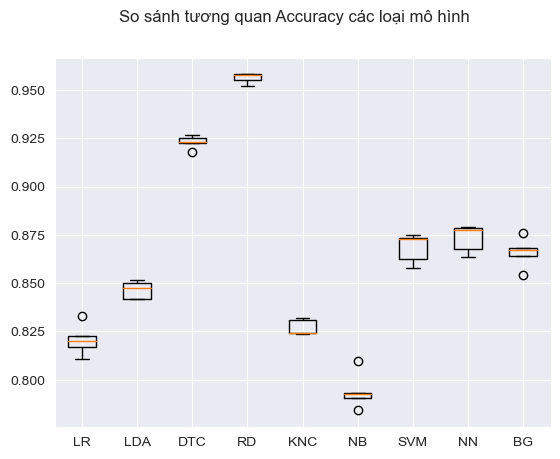

Precision LR: 75.282% (1.082%)
Precision LDA: 80.184% (0.503%)
Precision DTC: 90.499% (0.678%)
Precision RD: 94.131% (0.326%)
Precision KNC: 77.205% (0.984%)
Precision NB: 73.107% (1.034%)
Precision SVM: 83.633% (0.650%)
Precision NN: 85.268% (1.332%)
Precision BG: 83.485% (0.585%)


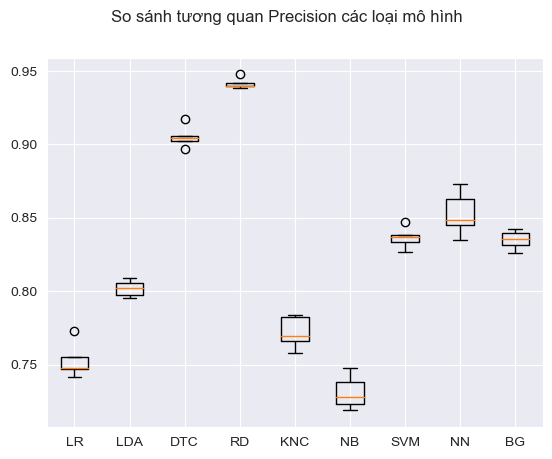

Recall LR: 95.491% (0.683%)
Recall LDA: 92.079% (0.719%)
Recall DTC: 94.103% (0.789%)
Recall RD: 97.314% (0.351%)
Recall KNC: 92.768% (0.314%)
Recall NB: 93.043% (0.648%)
Recall SVM: 91.608% (0.943%)
Recall NN: 91.877% (2.440%)
Recall BG: 91.247% (1.124%)


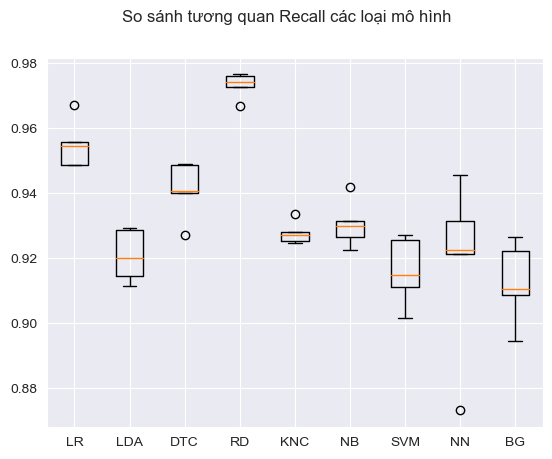

F1 LR: 84.184% (0.635%)
F1 LDA: 85.718% (0.390%)
F1 DTC: 92.474% (0.339%)
F1 RD: 95.695% (0.258%)
F1 KNC: 84.269% (0.514%)
F1 NB: 81.876% (0.831%)
F1 SVM: 87.437% (0.644%)
F1 NN: 87.161% (0.663%)
F1 BG: 87.190% (0.685%)


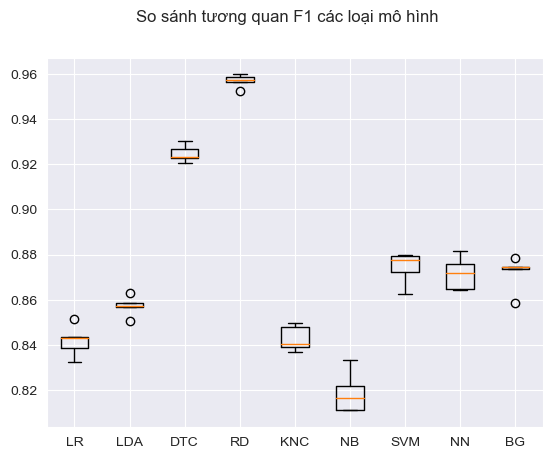

In [6]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


Accuracy LR: 93.948% (0.623%)
Accuracy LDA: 93.928% (0.625%)
Accuracy DTC: 91.177% (1.677%)
Accuracy RD: 94.125% (0.587%)
Accuracy KNC: 93.967% (0.647%)
Accuracy NB: 91.393% (0.148%)
Accuracy SVM: 93.967% (0.647%)
Accuracy NN: 93.692% (0.690%)
Accuracy BG: 93.908% (0.651%)


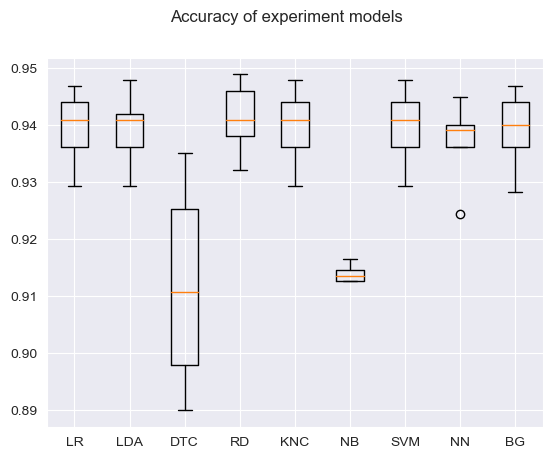

Precision LR: 0.000% (0.000%)
Precision LDA: 15.000% (20.000%)
Precision DTC: 25.394% (11.241%)
Precision RD: 62.500% (6.455%)
Precision KNC: 0.000% (0.000%)
Precision NB: 17.491% (4.391%)
Precision SVM: 0.000% (0.000%)
Precision NN: 3.333% (6.667%)
Precision BG: 0.000% (0.000%)


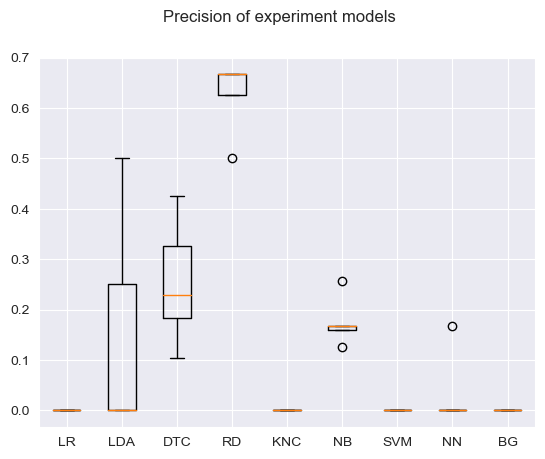

Recall LR: 0.000% (0.000%)
Recall LDA: 0.728% (0.893%)
Recall DTC: 26.664% (8.897%)
Recall RD: 6.073% (2.245%)
Recall KNC: 0.000% (0.000%)
Recall NB: 11.092% (1.751%)
Recall SVM: 0.000% (0.000%)
Recall NN: 1.761% (2.076%)
Recall BG: 0.000% (0.000%)


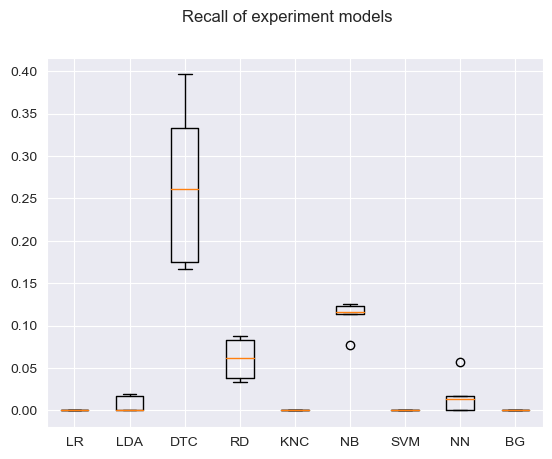

F1 LR: 0.000% (0.000%)
F1 LDA: 1.383% (1.698%)
F1 DTC: 26.194% (9.374%)
F1 RD: 10.972% (3.776%)
F1 KNC: 0.000% (0.000%)
F1 NB: 13.363% (2.126%)
F1 SVM: 0.000% (0.000%)
F1 NN: 1.658% (2.112%)
F1 BG: 0.000% (0.000%)


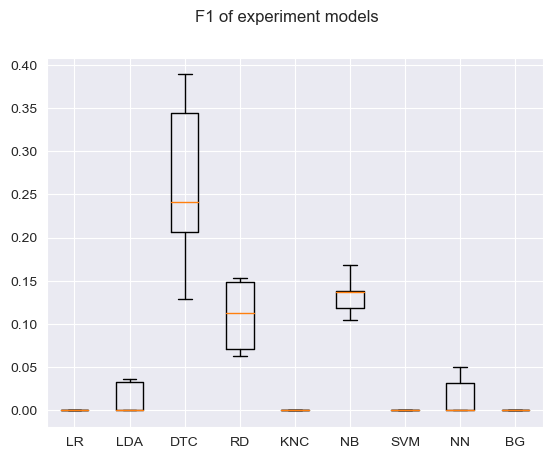

In [7]:
for scoring in scorings:
    check_model('LR',LogisticRegression(),x_test,y_test,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_test,y_test,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(),x_test,y_test,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,),x_test,y_test,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_test,y_test,names,results,scoring)
    check_model('NB',GaussianNB(),x_test,y_test,names,results,scoring)
    check_model('SVM',SVC(),x_test,y_test,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_test,y_test,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_test,y_test,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'{scoring.title()} of experiment models')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.savefig(f'So sánh tương quan {scoring.title()} các loại mô hình.png')
    plt.show()
    results=[]
    names=[]

In [8]:
names=[
    'LR',
    'LDA',
    'DTC',
    'RD',
    'KNC',
    'NB',
    'SVM',
    'NN',
    'BG']

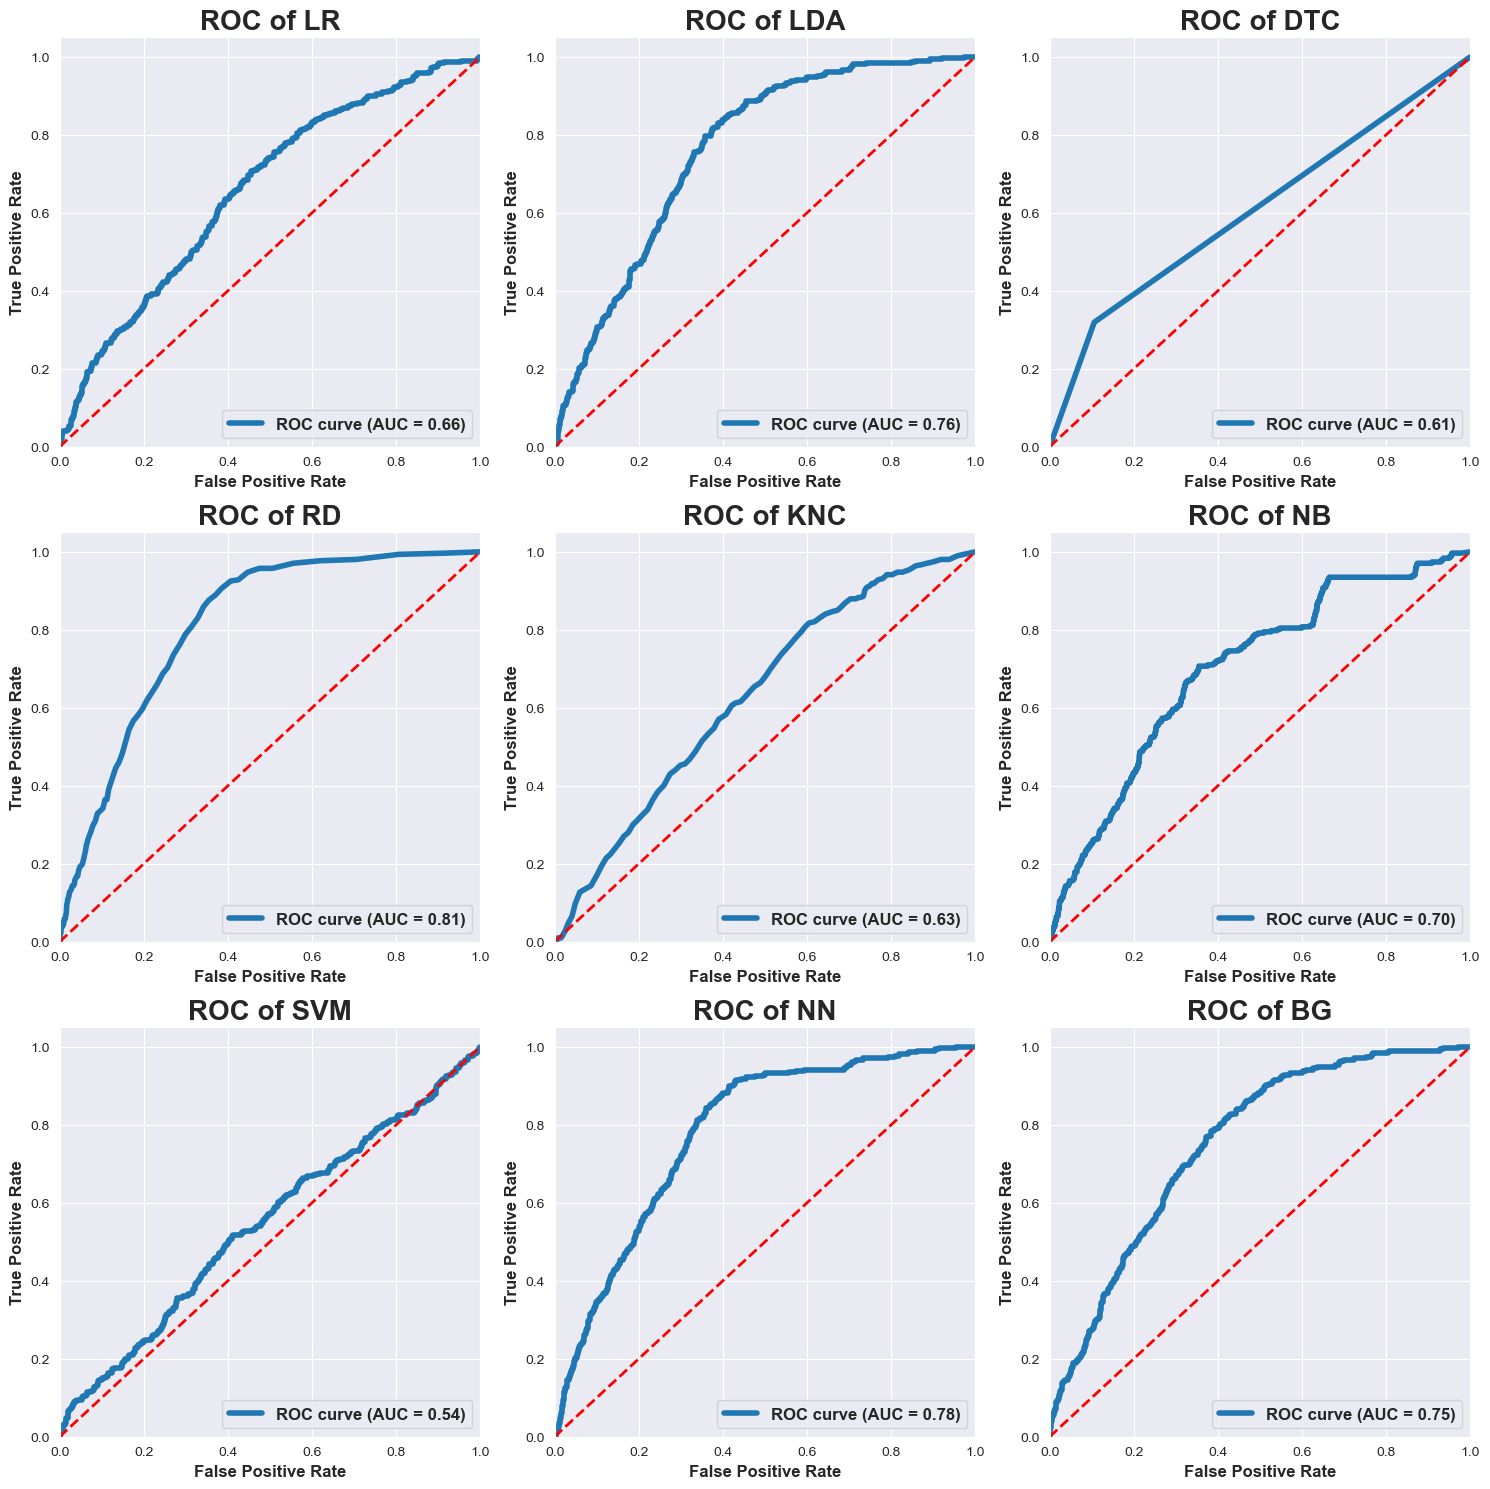

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, name, X_test, y_test, ax):
    model.fit(x_train,y_train)
    try:
        # Huấn luyện mô hình trên dữ liệu huấn luyện
        y_scores = model.predict_proba(X_test)[:,1]
    except:
        y_scores = model.decision_function(X_test)
    
    # Tính toán FPR và TPR từ decision function
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    
    # Tính diện tích dưới đường cong ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Vẽ đường cong ROC
    ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
    ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
    ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
    ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})  # Đặt kích thước và độ dày cho chú thích
        

# Tạo một lưới đồ thị 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
models=[LogisticRegression(),LinearDiscriminantAnalysis(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100, random_state=42),KNeighborsClassifier(n_neighbors=100),GaussianNB(),SVC(),MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)]
# Lặp qua từng mô hình và vẽ đường cong ROC
for i, model in enumerate(models):
    name=names[i]
    row = i // 3
    col = i % 3
    plot_roc_curve(model,name , x_test, y_test, ax=axes[row, col])

# Cân chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị đồ thị
plt.show()


In [10]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def train_model(best_model, x_train, y_train, features):
    x = x_train[features]
    for train_index, _ in kfold.split(x):
        X_train_fold, y_train_fold = x_train.iloc[train_index][features], y_train.iloc[train_index]
        
        # Huấn luyện mô hình tốt nhất trên fold hiện tại
        best_model.fit(X_train_fold, y_train_fold)
    return best_model


In [11]:
best_model1 = train_model(RandomForestClassifier(n_estimators=100, random_state=42),x_train=x_train,y_train=y_train,features=feature_selection['RD'])
best_model2=train_model(LinearDiscriminantAnalysis(),x_train=x_train,y_train=y_train,features=feature_selection['LDA'])


In [12]:
evaluate_result={}

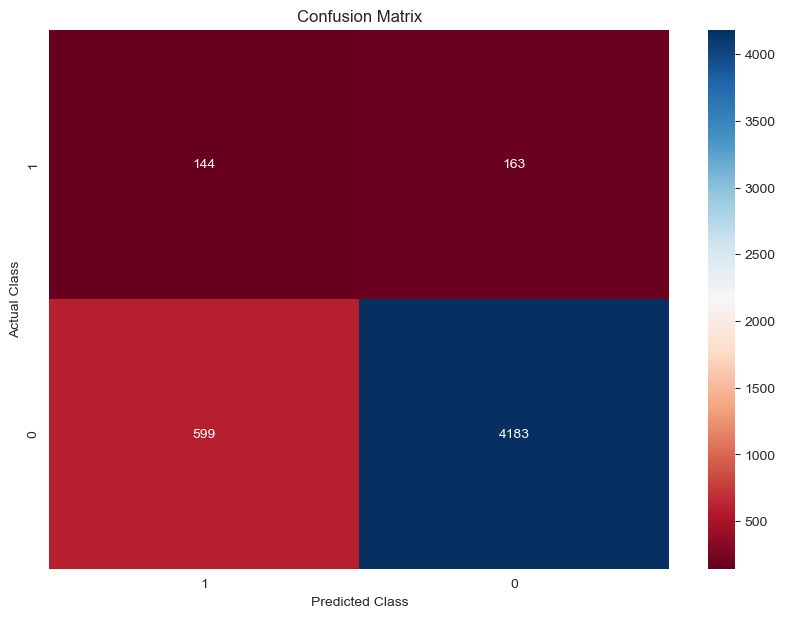

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      4782
           1       0.19      0.47      0.27       307

    accuracy                           0.85      5089
   macro avg       0.58      0.67      0.60      5089
weighted avg       0.92      0.85      0.88      5089



In [13]:
predictions = best_model1.predict(x_test[feature_selection['RD']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['RD']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

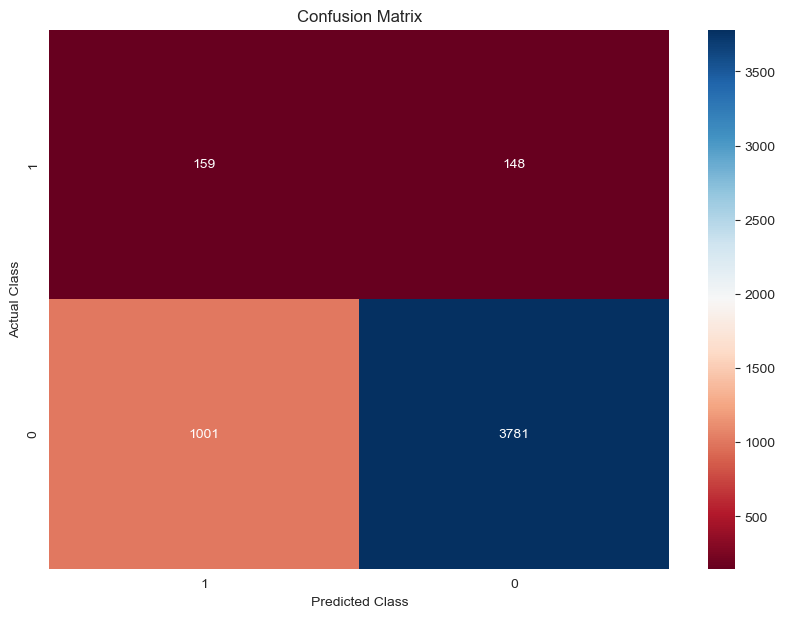

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      4782
           1       0.14      0.52      0.22       307

    accuracy                           0.77      5089
   macro avg       0.55      0.65      0.54      5089
weighted avg       0.91      0.77      0.83      5089



In [14]:
predictions = best_model2.predict(x_test[feature_selection['LDA']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LDA']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Random Forest

In [15]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

RD
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      4782
           1       0.19      0.47      0.27       307

    accuracy                           0.85      5089
   macro avg       0.58      0.67      0.60      5089
weighted avg       0.92      0.85      0.88      5089

LDA
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      4782
           1       0.14      0.52      0.22       307

    accuracy                           0.77      5089
   macro avg       0.55      0.65      0.54      5089
weighted avg       0.91      0.77      0.83      5089



In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Định nghĩa không gian siêu tham số
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
}

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=5)
random_search_rf.fit(x_train[feature_selection['RD']], y_train)

# In ra thông tin của mô hình Random Forest tốt nhất
print("Best Random Forest Hyperparameters:")
print(random_search_rf.best_params_)
n_estimators=random_search_rf.best_params_['n_estimators']
max_depth=random_search_rf.best_params_['max_depth']


Best Random Forest Hyperparameters:
{'n_estimators': 200, 'max_depth': 20}


In [18]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
rf_model.fit(x_train[feature_selection['RD']],y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

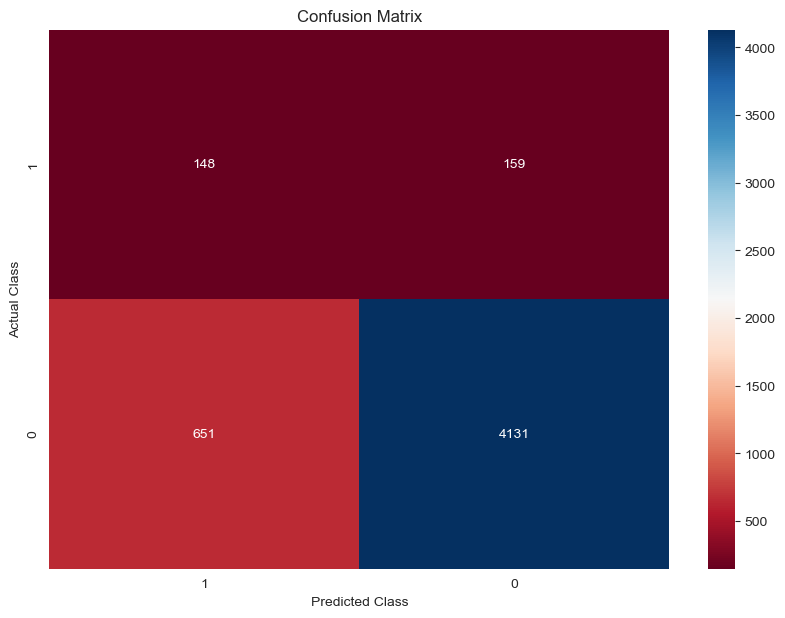

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4782
           1       0.19      0.48      0.27       307

    accuracy                           0.84      5089
   macro avg       0.57      0.67      0.59      5089
weighted avg       0.92      0.84      0.87      5089



In [19]:
predictions = rf_model.predict(x_test[feature_selection['RD']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LDA']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [20]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [21]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [22]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,best_model1, x_test[feature_selection['RD']], y_test):
        solandung+=1


Lần thứ 1: 
True: N
Predicted: N
----------------------------
Lần thứ 2: 
True: N
Predicted: N
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: N
----------------------------
Lần thứ 5: 
True: N
Predicted: Y
----------------------------
Lần thứ 6: 
True: N
Predicted: N
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: N
Predicted: N
----------------------------
Lần thứ 9: 
True: N
Predicted: N
----------------------------
Lần thứ 10: 
True: N
Predicted: N
----------------------------


In [23]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 9 chiếm khoảng 90.0% tổng lần dự đoán


In [24]:
solandung=0
hopdonggianlan=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = best_model1.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
        if Y_check=='Y':
            hopdonggianlan+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------


In [25]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")
print(f"Số hợp đồng gian lận trong lần kiểm tra: {hopdonggianlan} lần, chiếm khoảng {(hopdonggianlan/len(y_test[y_test['FraudFoundP']==1]))*100}% số hợp đồng gian lận trong thực tế")


Số lần dự đoán đúng trong lan kiểm tra: 4327 chiếm khoảng 85.02652780506976% tổng lần dự đoán


KeyError: 'FraudFoundP'